In [7]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [17]:
# define stste
class BMIState(TypedDict):
    height: float 
    weight: float  
    bmi: float     
    category: str  


In [10]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight']
    height = state['height']

    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)
    return state


In [14]:
def label_bmi(state: BMIState) -> BMIState :
    bmi = state["bmi"]
    if bmi < 18.5 :
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25 :
        state["category"] = "Normal"
    elif 25 <= bmi < 30 :
        state["category"] = "Overweight"
    else :
        state["category"] = "obese"
    return state

In [18]:
# define your graph

graph = StateGraph(BMIState)

# add nodes to your graph
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("label_bmi", label_bmi)

# add edges to your graph
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "label_bmi")
graph.add_edge("label_bmi", END)

# compile the graph
workflow = graph.compile()

# execute the graph
initial_state = {'height': 1.73, 'weight': 80}
final_state = workflow.invoke(initial_state)
print(final_state)


{'height': 1.73, 'weight': 80, 'bmi': 26.73, 'category': 'Overweight'}


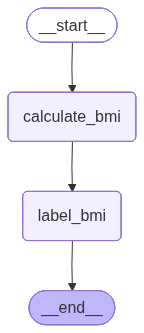

In [16]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())
